In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


Importing packages here:

In [2]:
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf

In [3]:
train_df = pd.read_csv('../input/digit-recognizer/train.csv')
test_df = pd.read_csv('../input/digit-recognizer/test.csv')
train_df.head()
# test_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Extracting labels from train dataframe

In [4]:
train_labels = train_df['label']
train_df.drop(['label'], axis = 1, inplace = True)
train_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


train and test images are extracted here

In [5]:
train_images = train_df.iloc[:, :].values.reshape(-1, 28, 28, 1)
test_images = test_df.iloc[:, :].values.reshape(-1, 28, 28, 1)

In [6]:
print(train_images.shape)
print(test_images.shape)

(42000, 28, 28, 1)
(28000, 28, 28, 1)


We can see 42,000 train images and 28,000 test images.

Let us plot some of the images from test set

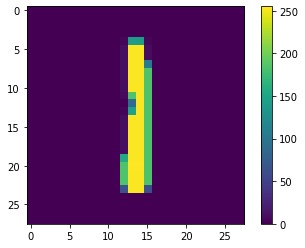

Label :1


In [7]:
plt.figure()
plt.imshow(train_images[2])
plt.colorbar()
plt.show()
print("Label :" + str(train_labels[2]))

Preprocessing the images

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Constructing a sequential model

Since the digits are from 0 - 9 we have 10 as softmax activation for 10 classes

In [9]:
model = keras.Sequential([ keras.layers.Flatten(input_shape = (28, 28)),
                           keras.layers.Dense(256, activation = tf.nn.relu),
                           keras.layers.Dense(128, activation = tf.nn.relu),
                           keras.layers.Dense(64, activation = tf.nn.relu),
                           keras.layers.Dense(10, activation = tf.nn.softmax)])

2022-05-01 17:19:10.246999: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Compiling model with adam and using sparse categorical entropy

In [10]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [11]:
model.fit(train_images, train_labels, epochs = 5)

2022-05-01 17:19:10.727298: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
1313/1313 [==============================] - 6s 4ms/step - loss: 0.2467 - accuracy: 0.9246
Epoch 2/5
1313/1313 [==============================] - 5s 4ms/step - loss: 0.1013 - accuracy: 0.9680
Epoch 3/5
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0682 - accuracy: 0.9790
Epoch 4/5
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0502 - accuracy: 0.9835
Epoch 5/5
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0430 - accuracy: 0.9856


Now predicting the classes for test images

In [12]:
preds = model.predict(test_images)
preds[1]

array([9.99994040e-01, 1.08667884e-07, 1.53075234e-07, 1.29443567e-09,
       2.65421152e-09, 9.08468678e-08, 4.11604879e-06, 7.74905743e-07,
       1.52103237e-08, 6.43028727e-07], dtype=float32)

Looking at label of the predicted image

In [13]:
print(np.argmax(preds[1]))

0


Looking at sample submission

In [14]:
samp_df = pd.read_csv('../input/digit-recognizer/sample_submission.csv')
samp_df.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [15]:
print(samp_df['Label'][1])

0


In [16]:
submission_df = pd.DataFrame(columns = ['ImageId', 'Label'])
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
for i in range(len(test_df.index)):
    submission_df.loc[i] = [i + 1 , np.argmax(preds[i])]
submission_df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [18]:
print(test_df.loc[len(test_df.index) - 1])
print(submission_df.loc[len(submission_df.index) - 1])

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 27999, Length: 784, dtype: int64
ImageId    28000
Label          2
Name: 27999, dtype: object


In [19]:
submission_df.to_csv('submission.csv', index = False)